In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

In [62]:
# Определение класса DenseNN
class DenseNN(tf.Module):
  def __init__(self, outputs):
    super().__init__()

    # Добавление выходных нейронов
    self.outputs = outputs

    # Флаг инициализации (первый вызов объекта через __call__)
    self.fl_init = False

  # Добавление объекту класса возможности "вызываться" как функции
  def __call__(self, x):
    # Если fl_init равен False, то
    if not self.fl_init:
      # Предварительно инициализируем весов и смещения
      self.w = tf.random.truncated_normal((3, self.outputs), stddev=0.1, name="w")
      self.b = tf.zeros([self.outputs], dtype=tf.float32, name="b")

      # Конвертация значений весов и смещения в переменные
      self.w = tf.Variable(self.w)
      self.b = tf.Variable(self.b)

      self.fl_init = True

    # Получение значений точки x и y, в контексте функции
    a, b = x[0, 0], x[0, 1]

    # Определение значения функции
    y = (self.w[0] * a + b) ** 4 + tf.math.sin(self.w[1] * a * b) - tf.math.cos(self.w[2] * b ** 2) + self.b

    return y

In [79]:
# Определение функции из первой задачи
func = lambda x, y: (2 * x + y) ** 4 + tf.math.sin(2 * x * y) - tf.math.cos(2 * y ** 2)
func2 = lambda x, y: (2.0000007 * x + y) ** 4 + tf.math.sin(2.0002048 * x * y) - tf.math.cos(-1.9996572 * y ** 2)

# Вывод данных функции
print(func(2.0, 1.0))
print(func2(2.0, 1.0))

tf.Tensor(624.65936, shape=(), dtype=float32)
tf.Tensor(624.6594, shape=(), dtype=float32)


In [158]:
# Размер выборки
SIZE = 1000

# Обучающий набор данных (образцы)
x_train = tf.random.uniform(minval=0, maxval=1.5, shape=(SIZE, 2))
# Правильные "ответы" для нейроной сети (метки)
y_train = [func(a, b) for a, b in x_train]

# Создание экземпляра класса DenseNN с одним выходным нейроном
model = DenseNN(1)

# Определение функции потерь - средний квадрат ошибки
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))

# Определение оптимизатора - оптимизатор Адам со скоростью обучения 0.001
opt = tf.optimizers.Adam(learning_rate=0.001)

# История функции потерь
loss_history = []

# Минимальная ошибка
min_loss = -1

In [159]:
for i in range(30):
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)
        y = tf.constant(y, shape=(1, 1))

        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))

        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    print(str(i+1) + ': ' + str(f_loss.numpy()))

    if f_loss.numpy() < min_loss or min_loss == -1:
        print('loss reduced from', min_loss, 'to', f_loss.numpy())
        min_loss = f_loss.numpy()

        f = open('saved_model', 'wb')
        pickle.dump(model, f)
        f.close()

    loss_history.append(f_loss.numpy())


1: 30.912624
loss reduced from -1 to 30.912624
2: 10.269479
loss reduced from 30.912624 to 10.269479
3: 0.32622084
loss reduced from 10.269479 to 0.32622084
4: 0.8710293
5: 1.183339
6: 1.0704263
7: 0.89768076
8: 0.6671095
9: 0.4004728
10: 0.1572233
loss reduced from 0.32622084 to 0.1572233
11: 0.01882878
loss reduced from 0.1572233 to 0.01882878
12: 0.0067875343
loss reduced from 0.01882878 to 0.0067875343
13: 0.042818908
14: 0.055426724
15: 0.039825972
16: 0.007683829
17: 0.0012839955
loss reduced from 0.0067875343 to 0.0012839955
18: 0.0028237756
19: 0.0005651874
loss reduced from 0.0012839955 to 0.0005651874
20: 3.0976385e-05
loss reduced from 0.0005651874 to 3.0976385e-05
21: 3.294403e-05
22: 1.237706e-05
loss reduced from 3.0976385e-05 to 1.237706e-05
23: 3.8960047e-07
loss reduced from 1.237706e-05 to 3.8960047e-07
24: 4.8466973e-09
loss reduced from 3.8960047e-07 to 4.8466973e-09
25: 4.035739e-06
26: 9.0676826e-07
27: 2.5934787e-05
28: 3.953778e-06
29: 1.0706799e-08
30: 7.196015

In [160]:
f = open('saved_model', 'rb')

model1 = pickle.load(f)

f.close()


print(model1.trainable_variables)

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.0013976], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.9999267],
       [1.9931198],
       [2.0007467]], dtype=float32)>)


(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.0013976], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.9999267],
       [1.9931198],
       [2.0007467]], dtype=float32)>)


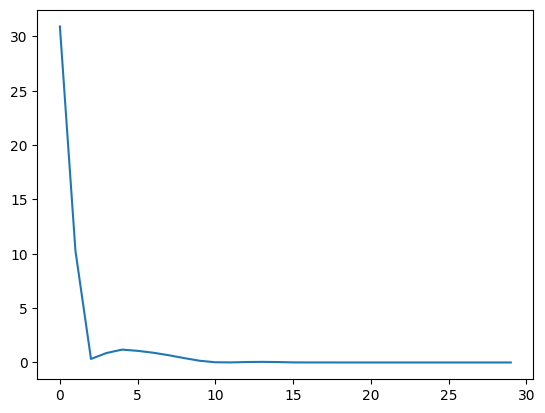

In [163]:
print(model1.trainable_variables)
plt.plot(loss_history)

In [209]:
x = [3.0, 2.0, 1.4, 0.9, 1.4]
y = [2.0, -2.0, 2.7, -3.0, 4.0]

result = []
sum = 0

for i in range(len(x)):
  a = func(x[i], y[i]).numpy()
  b = model1(tf.constant([[x[i], y[i]]])).numpy()[0]
  c = abs(a - b)
  sum += c

  result.append([a, b, c])


print("sum= ", (sum / len(x)))

for i in result:
  print("func1=", i[0], "; func2=", i[1], "; abs(func1 - func2)=", i[2])

sum=  0.13818259239196778
func1= 4095.609 ; func2= 4095.1287 ; abs(func1 - func2)= 0.4802246
func1= 15.156142 ; func2= 15.152173 ; abs(func1 - func2)= 0.0039691925
func1= 916.4481 ; func2= 916.3783 ; abs(func1 - func2)= 0.06982422
func1= 2.1860478 ; func2= 2.1945248 ; abs(func1 - func2)= 0.008476973
func1= 2136.3242 ; func2= 2136.1958 ; abs(func1 - func2)= 0.12841797


In [ ]:
# Обучение модели нейронной сети
for i in range(200):
    # Проход по кортежам
    for x, y in zip(x_train, y_train):
        # Расширение формы входного массива
        x = tf.expand_dims(x, axis=0)

        # Создание константы по существующему значению y
        y = tf.constant(y, shape=(1, 1))

        # Процесс вычисления градиента
        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))

        # Получение значения градиентов функции
        grads = tape.gradient(f_loss, model.trainable_variables)
        # Определение правил обновления градиента функции
        opt.apply_gradients(zip(grads, model.trainable_variables))

    # Вывод промежуточных результатов обучения
    print(str(i+1) + ': ' + str(f_loss.numpy()))

    # Если значение функции потерь меньше минимального значения, то
    if f_loss.numpy() < min_loss or min_loss == -1:
        # Вывести на экран промежуточную информацию
        print('loss reduced from', min_loss, 'to', f_loss.numpy())

        # Задать новое минимальное значение функции потерь
        min_loss = f_loss.numpy()

        # Записать в файл промежуточные результаты обучения нейронной сети
        f = open('saved_model', 'wb')
        pickle.dump(model, f)
        f.close()

    # Добавление в историю результатов функции потерь
    loss_history.append(f_loss.numpy())

# Открытие файла с результатами обучения нейронной сети
f = open('saved_model', 'rb')

# Загрузка из файла данных в модель
model = pickle.load(f)

# Закрытие файла
f.close()


# Вывод количества тренировочных параметров
print(model.trainable_variables)

# Вывод графика функции потерь
plt.plot(loss_history)

In [198]:
# Определение функции из первой задачи
func_test = lambda x, y: (2 * x + y) ** 4 + tf.math.sin(2 * x * y) - tf.math.cos(2 * y ** 2)
func_test_r = lambda x, y: (1.9999267 * x + y) ** 4 + tf.math.sin(1.9931198 * x * y) - tf.math.cos(2.0007467 * y ** 2)

x = [3.0, 2.0]
y = [2.0, -2.0]

result = []
sum = 0

for i in range(len(x)):
  a = func_test(x[i], y[i]).numpy()
  b = func_test_r(x[i], y[i]).numpy()
  c = abs(a - b)
  sum += c

  result.append([a, b, c])

print(sum / len(x))
print()

for i in result:
  print(i)

0.24364995956420898

[4095.609, 4095.127, 0.4819336]
[15.156142, 15.150776, 0.0053663254]


In [217]:
import time

# Исходная функция
def function_tf(x, y):
    f = (2 * x + y) ** 4 + tf.math.sin(2 * x * y) - tf.math.cos(2 * y ** 2)
    return f

# Новая функция с декоратором tf.function
@tf.function
def function_tf_optimize(x, y):
    f = (2 * x + y) ** 4 + tf.math.sin(2 * x * y) - tf.math.cos(2 * y ** 2)
    return f

# Функция для тестирования
def test_function(fn):

  # Локальная функция
  def wrapper(*args, **kwargs):
      # Запоминаем время начала вычислений
      start = time.time()

      # Вызов функции
      fn(*args, **kwargs)

      # Получаем продолжительность вычислений
      dt = time.time() - start
      print(f"Время обработки: {dt} сек")

  # Возвращение локальной функции
  return wrapper

# Размер тестовых данных
SIZE = 10000

# Генерация тестовых данных, заполненных единицами
x = tf.ones((SIZE, SIZE), dtype=tf.float32)
y = tf.ones_like(x, dtype=tf.float32)

print("Вычисления с исходной функцией")
# Вызов тестовой функции с передачей ей исходной функции
test_function(function_tf)(x, y)

print()

print("Вычисления с функцией, обёрнутой в tf.function")
# Вызов тестовой функции с передачей ей функции,
# которая преобразована в операции на основе графа
test_function(function_tf_optimize)(x, y)

Вычисления с исходной функцией
Время обработки: 7.892157554626465 сек

Вычисления с функцией, обёрнутой в tf.function
Время обработки: 3.3543646335601807 сек


In [249]:
import tensorflow as tf
import numpy as np

# Определение узла для умножения
class MultiplyNode(object):
  def __init__(self, theParam=1):
    self.param = theParam

  # Прямой проход
  def forward(self, x, y):
    z = self.param * x * y

    self.x = x
    self.y = y

    return z

  # Обратный проход
  def backward(self, dz = 1.0):
    # Производная по y
    dy = self.param * self.x * dz #dx/dt*dL/dz

    # Производная по x
    dx = self.param * self.y * dz

    return [dx, dy]

# Определение узла для суммы
class SumNode(object):
  def __init__(self, theParam = 1):
    self.param = theParam

  # Прямой проход
  def forward(self, x, y):
    z = self.param * x + y

    self.x = x
    self.y = y

    return z

  # Обратный проход
  def backward(self, dz = 1.0):
    dy = dz #dx/dt*dL/dz
    dx = self.param * dz

    return [dx, dy]

# Определение узла для возведения в степень
class PowNode(object):

  def __init__(self, theParam = 1.0, coef = 1.0):
    self.param = theParam
    self.coef = coef

  # Прямой проход
  def forward(self, x):
    z = self.coef * x ** self.param

    self.x = x

    return z

  # Обратный проход
  def backward(self, dz = 1.0):
    dx = (self.param * self.coef) * (self.x ** (self.param - 1)) * dz
    return dx

# Определение узла для синуса
class SinNode(object):
  def forward(self, x):
    z = tf.math.sin(x)
    self.x = x

    return z

  def backward(self, x):
    dx = tf.math.cos(x)

    return dx

# Определение узла для косинуса
class CosNode(object):
  def forward(self, x):
    z = -1.0 * tf.math.cos(x)
    self.x = x

    return z

  def backward(self, x):
    dx = tf.math.sin(x)

    return dx

nodeA = SumNode(2)
nodeB = PowNode(4)
nodeC = MultiplyNode(2)
nodeD = SinNode()
nodeE = PowNode(2, 2)
nodeF = CosNode()

resA = nodeA.forward(2.0, -2.0)
resB = nodeB.forward(resA)

resC = nodeC.forward(2.0, -2.0)
resD = nodeD.forward(resC)

resE = nodeE.forward(-2.0)
resF = nodeF.forward(resE);

gradAx = nodeA.backward()[0] * nodeB.backward()
gradAy = nodeA.backward()[1] * nodeB.backward()

gradBx = nodeC.backward()[0] * nodeD.backward(resC)
gradBy = nodeC.backward()[1] * nodeD.backward(resC)

gradCy = nodeE.backward() * nodeF.backward(resE)

gradX = gradAx + gradBx
gradY = gradAy + gradBy + gradCy

print(gradX.numpy(), gradY.numpy())


64.582 23.503134
